In [26]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #04 - Chaos

Purpose:
Script to examine how chaos manifests in simple model.
[PUT MORE INFORMATION HERE - I.E., WHAT SPECIFIC THING IS BEING DONE]

"""
__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

In [27]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles


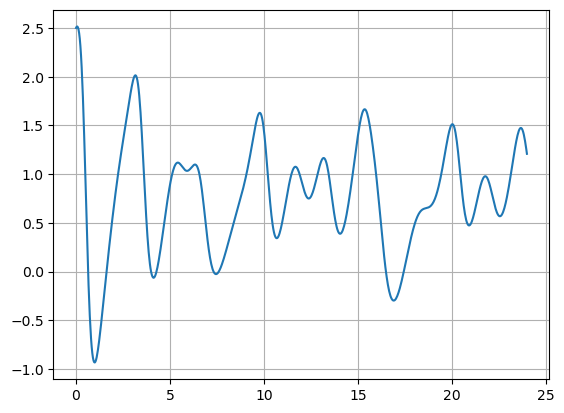

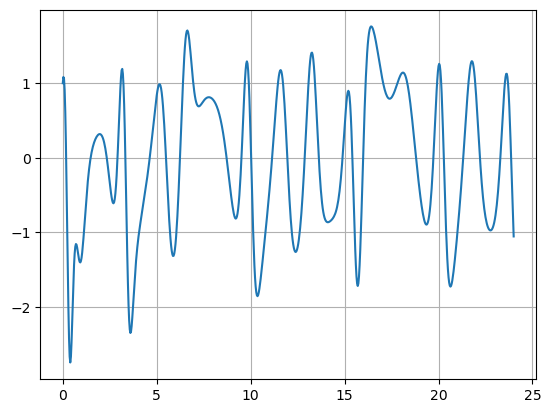

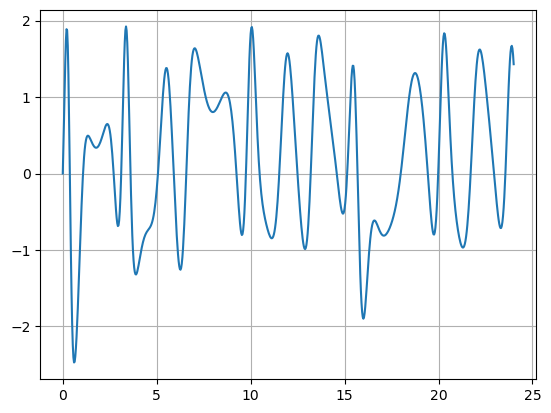

In [28]:
t_end = 120 #days
t_start = 0 #days
del_t = 4 #hours
t_norm = 5 #days

t_end_norm = 24
t_start_norm = 0
del_t_norm = 1/30 #4/24.5 = 4/120 = 1/30
time_steps = int(t_end_norm/del_t_norm) # = 24/(1/20) = 720

a = 0.25
b = 4.0
F = 8.0
G = 1.0

time = np.arange(t_start_norm, t_end_norm+0.00001, del_t_norm)
x = np.zeros(len(time))
y = np.zeros(len(time))
z = np.zeros(len(time))


x[0] = 2.5 #2.49? #circumpolar westerlies 
y[0] = 1.0 #1.0? #cos(waves)
z[0] = 0.0 #0.0  #sin(waves)


for dt in range(1,len(x)):
    dxdt = -y[dt-1]**2 -z[dt-1]**2 -a*x[dt-1] +a*F
    dydt = x[dt-1]*y[dt-1] - b*x[dt-1]*z[dt-1] -y[dt-1] +G
    dzdt = b*x[dt-1]*y[dt-1] + x[dt-1]*z[dt-1] -z[dt-1]

    x[dt] = x[dt-1]+del_t_norm*dxdt
    y[dt] = y[dt-1]+del_t_norm*dydt
    z[dt] = z[dt-1]+del_t_norm*dzdt

plt.plot(time, x)
plt.grid()
plt.show()

plt.plot(time, y)
plt.grid()
plt.show()

plt.plot(time, z)
plt.grid()
plt.show()
# x_of_t_plus_del_t = x_of_t + del_t*dxdt #dxdt(t)? --> x_of_t + del_t[-y(t)**2 -z(t)**2 -ax(t)**2 +A*F]
# y_of_t_plus_del_t = y_of_t + del_t*dydt #dydt(t)?
# z_of_t_plus_del_t = z_of_t + del_t*dzdt #dzdt(t)?

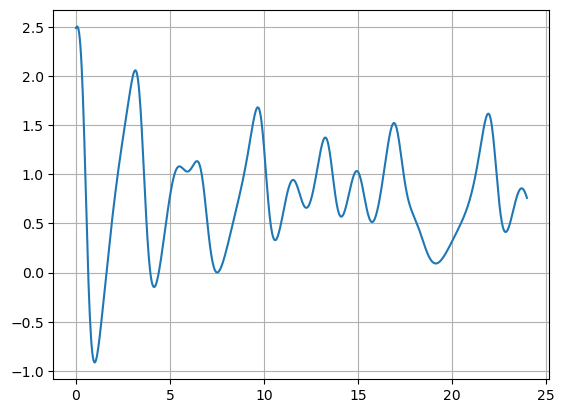

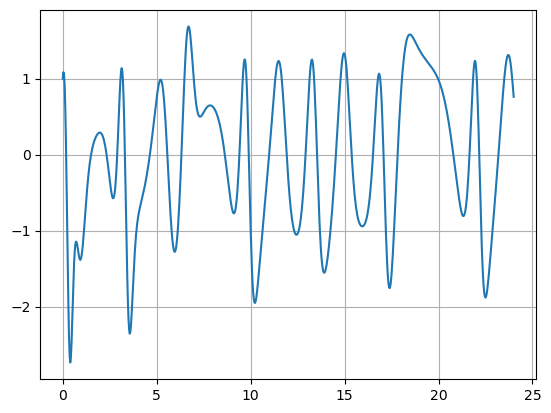

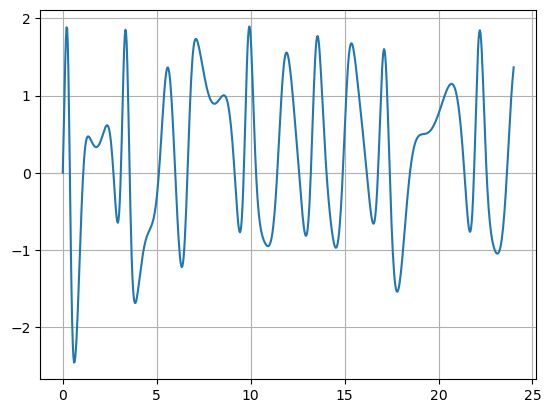

In [30]:
t_end = 120 #days
t_start = 0 #days
del_t = 4 #hours
t_norm = 5 #days

t_end_norm = 24
t_start_norm = 0
del_t_norm = 1/30 #4/24.5 = 4/120 = 1/30
time_steps = int(t_end_norm/del_t_norm) # = 24/(1/20) = 720

a = 0.25
b = 4.0
F = 8.0
G = 1.0

time = np.arange(t_start_norm, t_end_norm+0.00001, del_t_norm)
x = np.zeros(len(time))
y = np.zeros(len(time))
z = np.zeros(len(time))


x[0] = 2.49 #circumpolar westerlies 
y[0] = 1.0  #cos(waves)
z[0] = 0.0  #sin(waves)


for dt in range(1,len(x)):
    dxdt = -y[dt-1]**2 -z[dt-1]**2 -a*x[dt-1] +a*F
    dydt = x[dt-1]*y[dt-1] - b*x[dt-1]*z[dt-1] -y[dt-1] +G
    dzdt = b*x[dt-1]*y[dt-1] + x[dt-1]*z[dt-1] -z[dt-1]

    x[dt] = x[dt-1]+del_t_norm*dxdt
    y[dt] = y[dt-1]+del_t_norm*dydt
    z[dt] = z[dt-1]+del_t_norm*dzdt

plt.plot(time, x)
plt.grid()
plt.show()

plt.plot(time, y)
plt.grid()
plt.show()

plt.plot(time, z)
plt.grid()
plt.show()
# x_of_t_plus_del_t = x_of_t + del_t*dxdt #dxdt(t)? --> x_of_t + del_t[-y(t)**2 -z(t)**2 -ax(t)**2 +A*F]
# y_of_t_plus_del_t = y_of_t + del_t*dydt #dydt(t)?
# z_of_t_plus_del_t = z_of_t + del_t*dzdt #dzdt(t)?

In [29]:
### In a separte text file (or below), provide a discussion of your results ###
### Make sure to answer the following questions in your discussion          ###
### 1 - Are the two simulations the same throughout the entire period?      ###
###     If not, when do they diverge?                                       ###
### 2 - If the ending points are different, what does this say regarding    ###
###     the importance of providing NWP models, assuming this serves as a   ###
###     proxy for one, with accurate and balanced initial conditions?       ###
'''
    

'''

'\n    \n\n'